<a href="https://colab.research.google.com/github/ahyatt7/IntroToML/blob/main/Homework_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Spring 2023/Intro to ML/D3.csv')

x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
y = df.values[:,3]
m = len(y)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 1.0, 'Plot of x1 and y')

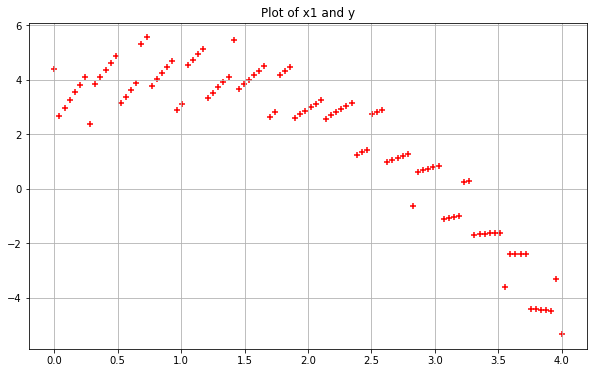

In [291]:
plt.figure()
plt.scatter(x1, y, color = 'red', marker = '+')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.title('Plot of x1 and y')

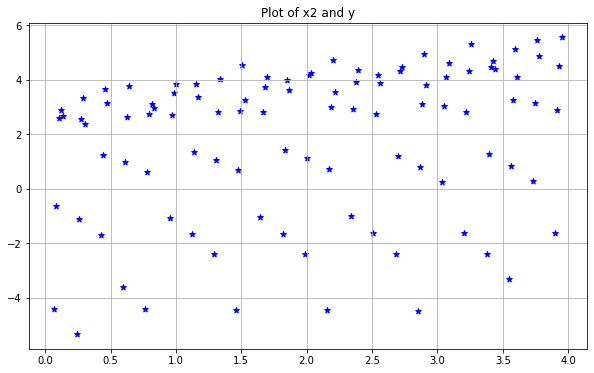

In [292]:
plt.figure()
plt.scatter(x2, y, color = 'blue', marker = '*')
plt.title('Plot of x2 and y')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 

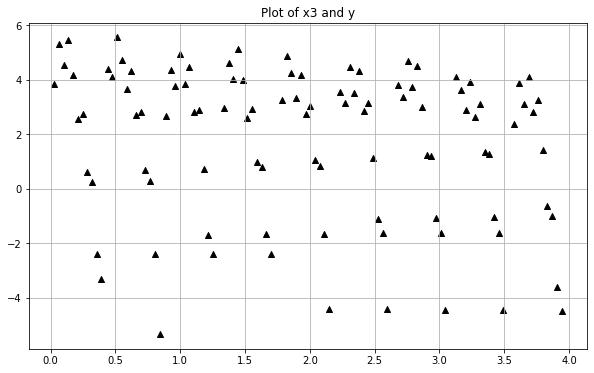

In [293]:
plt.figure()
plt.scatter(x3, y, color = 'black', marker = '^')
plt.title('Plot of x3 and y')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 

In [294]:
X_0 = np.ones((m, 1))

X_1 = x1.reshape(m, 1)
x1Feature = np.hstack((X_0, X_1))
print(x1Feature[:5])

X_2 = x2.reshape(m, 1)
x2Feature = np.hstack((X_0, X_2))
print(x2Feature[:5])

X_3 = x3.reshape(m, 1)
x3Feature = np.hstack((X_0, X_3))
print(x3Feature[:5])

[[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
[[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
[[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [295]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J

In [296]:
theta = np.zeros(2)
cost1 = compute_cost(x1Feature, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost1) 

theta = np.zeros(2)
cost2 = compute_cost(x2Feature, y, theta)
print('The cost for given values of theta_2 and theta_3 =', cost2) 

theta = np.zeros(2)
cost3 = compute_cost(x3Feature, y, theta)
print('The cost for given values of theta_4 and theta_5 =', cost3) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_2 and theta_3 = 5.524438459196242
The cost for given values of theta_4 and theta_5 = 5.524438459196242


In [297]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [298]:
iterations = 2000; 
alpha = 0.09;

Final value of theta = [ 5.92794892 -2.03833663]
cost_history = [5.19870843 5.00298045 4.83844135 ... 0.98499308 0.98499308 0.98499308]


Text(0.5, 1.0, 'Convergence of gradient descent for x1')

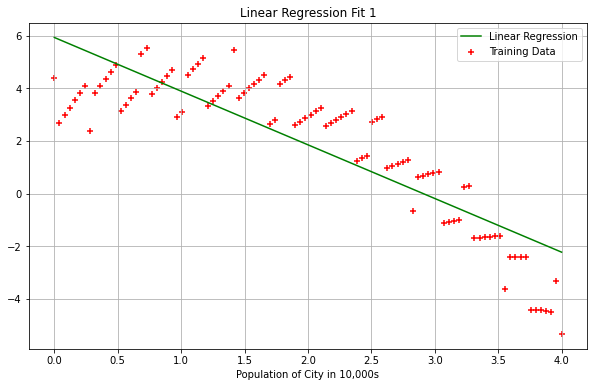

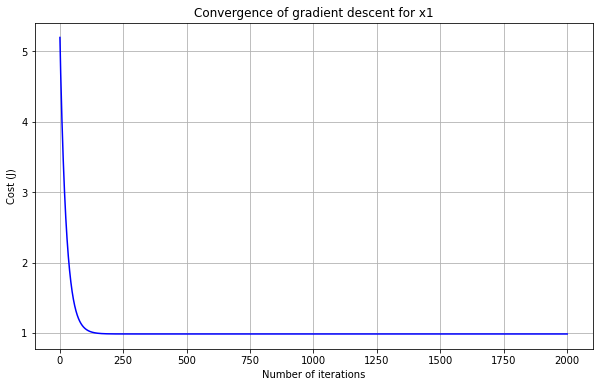

In [299]:
theta = [0., 0.] 
theta, cost_history1 = gradient_descent(x1Feature, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history1)

plt.figure()
plt.scatter(x1Feature[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(x1Feature[:,1],x1Feature.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Population of City in 10,000s')
plt.title('Linear Regression Fit 1') 
plt.legend()

plt.figure()
plt.plot(range(1, iterations + 1),cost_history1, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent for x1')

Final value of theta = [0.73606043 0.55760761]
cost_history = [4.00462041 3.69945673 3.63759188 ... 3.59936602 3.59936602 3.59936602]


Text(0.5, 1.0, 'Convergence of gradient descent for x2')

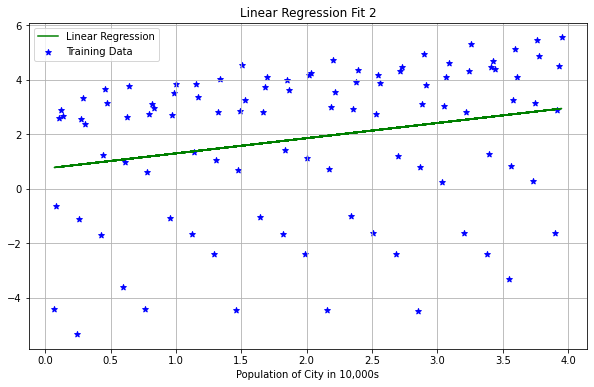

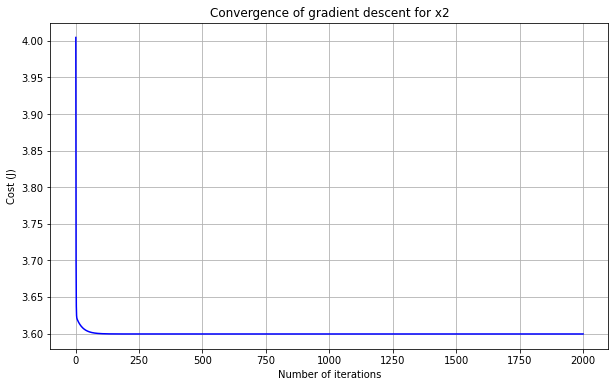

In [300]:
theta = [0., 0.] 
theta, cost_history2 = gradient_descent(x2Feature, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history2)

plt.figure()
plt.scatter(x2Feature[:,1], y, color = 'blue', marker = '*', label= 'Training Data') 
plt.plot(x2Feature[:,1],x2Feature.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Population of City in 10,000s')
plt.title('Linear Regression Fit 2') 
plt.legend()

plt.figure()
plt.plot(range(1, iterations + 1),cost_history2, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent for x2')

Final value of theta = [ 2.8714221  -0.52048288]
cost_history = [4.7228886  4.52287495 4.45345627 ... 3.62945112 3.62945112 3.62945112]


Text(0.5, 1.0, 'Convergence of gradient descent for x3')

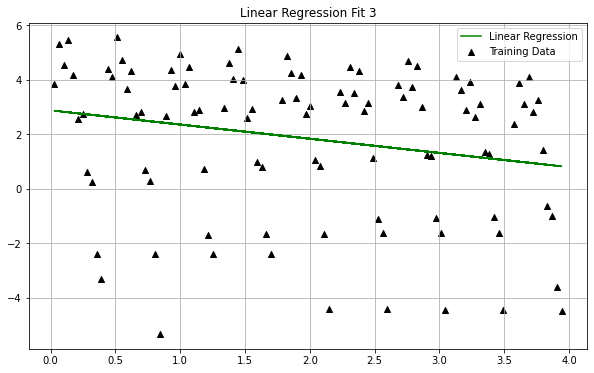

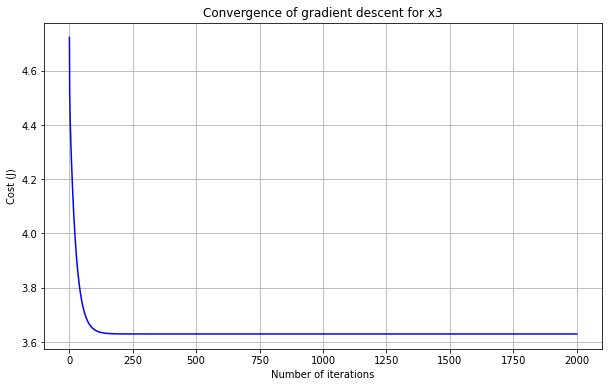

In [301]:
from matplotlib import figure
theta = [0., 0.] 
theta, cost_history3 = gradient_descent(x3Feature, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history3)

plt.figure()
plt.scatter(x3Feature[:,1], y, color = 'black', marker = '^', label= 'Training Data') 
plt.plot(x3Feature[:,1],x3Feature.dot(theta), color='green', label='Linear Regression') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.title('Linear Regression Fit 3') 
plt.legend()

plt.figure()
plt.plot(range(1, iterations + 1),cost_history3, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent for x3')

[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]]
The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 5.3141671  -2.00371926  0.53256335 -0.26560185]
cost_history = [4.10038644 3.5871816  3.22984001 ... 0.73846424 0.73846424 0.73846424]


Text(0.5, 1.0, 'Linear Regression Fit 4')

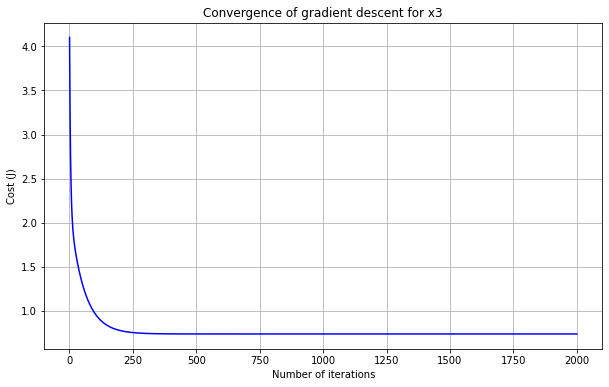

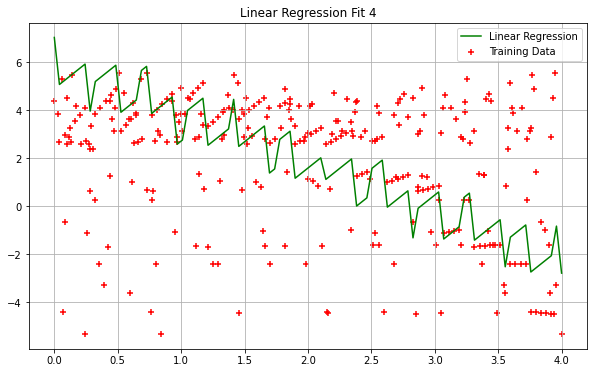

In [302]:
theta = np.zeros(4)
allXFeature = np.hstack((X_0, X_1, X_2, X_3))
print(allXFeature[:5])
costAll = compute_cost(allXFeature, y, theta)
print('The cost for given values of theta_0 and theta_1 =', costAll) 

theta = np.zeros(4)
thetaAll, cost_historyAll = gradient_descent(allXFeature, y, theta, alpha, iterations) 
print('Final value of theta =', thetaAll) 
print('cost_history =', cost_historyAll)

plt.figure()
plt.plot(range(1, iterations + 1),cost_historyAll, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent for x3')

plt.figure()
plt.scatter(allXFeature[:,1], y, color='red', marker= '+') 
plt.scatter(allXFeature[:,2], y, color='red', marker= '+') 
plt.scatter(allXFeature[:,3], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(allXFeature[:,1],allXFeature.dot(thetaAll), color='green', label='Linear Regression') 
plt.legend()
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.title('Linear Regression Fit 4') 

Text(0.5, 1.0, 'Linear Regression Fit 5')

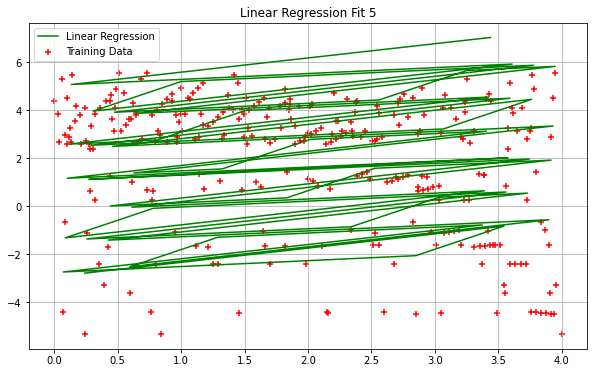

In [303]:
plt.figure()
plt.scatter(allXFeature[:,1], y, color='red', marker= '+') 
plt.scatter(allXFeature[:,2], y, color='red', marker= '+') 
plt.scatter(allXFeature[:,3], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(allXFeature[:,2],allXFeature.dot(thetaAll), color='green', label='Linear Regression') 
plt.legend()
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.title('Linear Regression Fit 5') 

Text(0.5, 1.0, 'Linear Regression Fit 6')

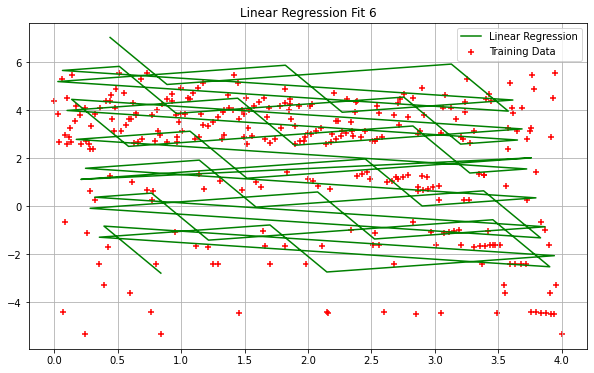

In [304]:
plt.figure()
plt.scatter(allXFeature[:,1], y, color='red', marker= '+') 
plt.scatter(allXFeature[:,2], y, color='red', marker= '+') 
plt.scatter(allXFeature[:,3], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(allXFeature[:,3],allXFeature.dot(thetaAll), color='green', label='Linear Regression') 
plt.legend()
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.title('Linear Regression Fit 6') 